## Load Data

In [2]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [3]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Weight Increasing (std=1)

In [8]:
# solution 1: increase weight value

initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=10.0, seed=None)

model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer= initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer= initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer= initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer= initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer= initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer= initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer= initializer))
model.add(keras.layers.Dense(10))

model.compile(optimizer=keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

Epoch 1/300
118/118 - 1s - loss: 2.3999 - accuracy: 0.1030 - val_loss: 2.3757 - val_accuracy: 0.1020 - 1s/epoch - 10ms/step
Epoch 2/300
118/118 - 1s - loss: 2.3686 - accuracy: 0.1039 - val_loss: 2.3597 - val_accuracy: 0.1105 - 519ms/epoch - 4ms/step
Epoch 3/300
118/118 - 1s - loss: 2.3540 - accuracy: 0.1104 - val_loss: 2.3472 - val_accuracy: 0.1167 - 518ms/epoch - 4ms/step
Epoch 4/300
118/118 - 0s - loss: 2.3418 - accuracy: 0.1150 - val_loss: 2.3331 - val_accuracy: 0.1155 - 490ms/epoch - 4ms/step
Epoch 5/300
118/118 - 1s - loss: 2.3255 - accuracy: 0.1222 - val_loss: 2.3251 - val_accuracy: 0.1257 - 501ms/epoch - 4ms/step
Epoch 6/300
118/118 - 1s - loss: 2.3196 - accuracy: 0.1257 - val_loss: 2.3216 - val_accuracy: 0.1247 - 517ms/epoch - 4ms/step
Epoch 7/300
118/118 - 1s - loss: 2.3125 - accuracy: 0.1284 - val_loss: 2.3098 - val_accuracy: 0.1310 - 509ms/epoch - 4ms/step
Epoch 8/300
118/118 - 1s - loss: 2.3036 - accuracy: 0.1323 - val_loss: 2.2996 - val_accuracy: 0.1376 - 523ms/epoch - 4ms

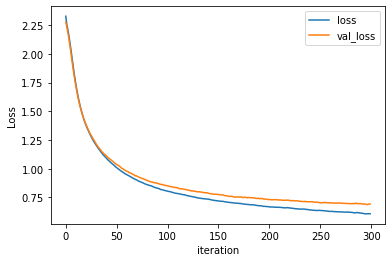

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

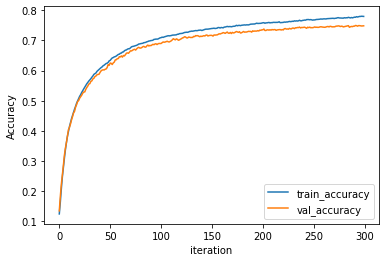

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()